# Simulated DCA Demo

In [1]:
from hyppo.tools import SIMULATIONS
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pickle

import dist_cov as dc

In [2]:
np.random.seed(8)

# DCA Feature Selection

## nD Simulated Linear Independence Data

### Initialize Data

In [3]:
lin_sim = SIMULATIONS["linear"]
X, Y = lin_sim(100, 10, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (100, 10)
Y shape: (100, 1)
u: [0.50332684 0.18612288 0.42925912 0.24581539 0.19994197 0.32113131
 0.25498634 0.05827292 0.28006121 0.42116697]
u norm: 1.0


/home/db202/anaconda3/envs/hyppo/lib/python3.9/site-packages/numba/core/typed_passes.py:331: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "dist_cov.py", line 45:
@njit(parallel=True)
def dist_mat_u(u, X):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


### Test Function Dimension Alignment

In [4]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [-121.71804594  -53.46510889  -73.1753186   -44.96939186  -40.56348255
  -48.49783653  -29.30013122  -11.52290092  -61.73768076  -56.81719011]
v^2: 3.5125181572909887


### DCA

In [5]:
print(f"X shape: {X.shape}")
print(f"X:\n{X[:5]}")
X_reduced = dc.dca(X, Y, K=3)
print(f"X_reduced shape: {X_reduced.shape}")
print(f"X_reduced:\n{X_reduced[:5]}")

X shape: (100, 10)
X:
[[ 0.74685881  0.93708133  0.73838908  0.06171138 -0.53454334 -0.97720239
  -0.13906236 -0.19529728  0.04534934 -0.04321641]
 [ 0.11071295  0.08677204  0.52179115  0.42474915  0.23936419 -0.14781646
  -0.42184994  0.94771048 -0.33245191 -0.56239788]
 [-0.86838322  0.96574109 -0.74428857 -0.35573841 -0.85811431 -0.55046012
  -0.21273017  0.79229001 -0.30907678  0.96949887]
 [-0.9425359  -0.29663053 -0.23808222  0.52832026  0.87760783 -0.36062041
  -0.13504813 -0.45970852  0.60211177  0.27647761]
 [-0.86261973  0.20728895  0.59114912 -0.93598369 -0.08910436  0.58034508
   0.97719304  0.16792909 -0.9221754  -0.10715418]]
X_reduced shape: (100, 3)
X_reduced:
[[-0.13906236  0.04534934  0.74685881]
 [-0.42184994 -0.33245191  0.11071295]
 [-0.21273017 -0.30907678 -0.86838322]
 [-0.13504813  0.60211177 -0.9425359 ]
 [ 0.97719304 -0.9221754  -0.86261973]]


# DCA with Gradient-Based Learning Approach

## 1D Simulated Linear Independence Data

### Plot Dataset

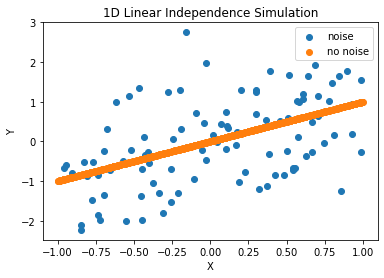

In [6]:
lin_sim = SIMULATIONS["linear"]
lin_x_n, lin_y_n = lin_sim(100, 1, noise=True)
lin_x, lin_y = lin_sim(1000, 1)
plt.scatter(lin_x_n, lin_y_n)
plt.scatter(lin_x, lin_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("1D Linear Independence Simulation")
plt.legend(["noise", "no noise"]);

### Initialize Data

In [7]:
X, Y = lin_sim(10, 1, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u_normalized_norm = LA.norm(dc.normalize_u(u))
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_normalized_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (10, 1)
Y shape: (10, 1)
u: [0.87101109]
u norm: 1.0


### Test Function Dimension Alignment

In [8]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [-19.25195988]
v^2: 1.2186561661884507


### Optimize $u$

In [9]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-2, 1e-6)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 1.061463038128662
u opt: [1.]
v^2_u_opt: 1.2186561661884507


### Plot Gradient Ascent

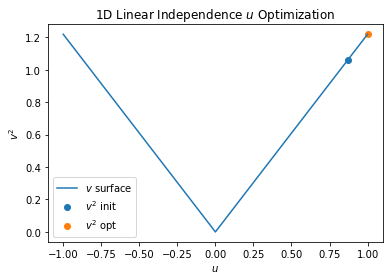

In [10]:
u_plt = np.expand_dims(np.linspace(-1, 1, 11), 1)
v_u_plt = np.zeros_like(u_plt)
for i in range(u_plt.shape[0]):
    D_u_i = dc.dist_mat_u(u_plt[i], X)
    R_X_u_i = dc.re_centered_dist(D_u_i)
    v_u_i = dc.dist_cov_sq(R_Y, R_X_u_i)
    v_u_plt[i] = v_u_i
plt.plot(u_plt, v_u_plt)
plt.scatter([u], [v_u])
plt.scatter([u_opt], [v_opt])
plt.xlabel(r"$u$")
plt.ylabel(r"$v^2$")
plt.title(r"1D Linear Independence $u$ Optimization")
plt.legend([r'$v$ surface', r'$v^2$ init', r'$v^2$ opt']);

## 2D Simulated Linear Independence Data

### Plot Dataset

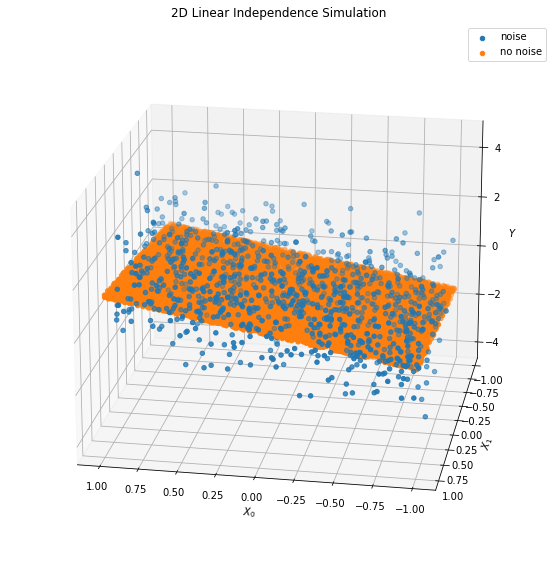

In [11]:
lin_sim = SIMULATIONS["linear"]
lin_x_n, lin_y_n = lin_sim(1000, 2, noise=True)
lin_x, lin_y = lin_sim(10000, 2)

lin_x_1_n = lin_x_n[:, 0]
lin_x_2_n = lin_x_n[:, 1]
lin_x_1 = lin_x[:, 0]
lin_x_2 = lin_x[:, 1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(lin_x_1_n, lin_x_2_n, lin_y_n)
ax.scatter(lin_x_1, lin_x_2, lin_y)
ax.set_xlabel(r"$X_0$")
ax.set_ylabel(r"$X_1$")
ax.set_zlabel(r"$Y$")
plt.title("2D Linear Independence Simulation")
plt.legend(["noise", "no noise"])
ax.view_init(elev=20, azim=100);

### Initialize Data

In [12]:
X, Y = lin_sim(10, 2, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (10, 2)
Y shape: (10, 1)
u: [0.6360889  0.77161578]
u norm: 1.0


### Test Function Dimension Alignment

In [13]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [ -7.80388808 -10.17419944]
v^2: 1.0511235723888304


### Optimize $u$

In [14]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-2, 1e-6)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 0.861198753529272
u opt: [0.60869683 0.79340291]
v^2_u_opt: 0.8592869890807933


### Plot Gradient Ascent

In [15]:
surf_res = 1e-1
X_surf = np.arange(-1, 1, surf_res)
Y_surf = np.arange(-1, 1, surf_res)
X_surf, Y_surf = np.meshgrid(X_surf, Y_surf)
v_u_plt = np.zeros_like(X_surf)
for i in range(X_surf.shape[0]):
    for j in range(X_surf.shape[1]):
        D_u_i = dc.dist_mat_u(np.array([X_surf[i, j], Y_surf[i, j]]), X)
        R_X_u_i = dc.re_centered_dist(D_u_i)
        v_u_i = dc.dist_cov_sq(R_Y, R_X_u_i)
        v_u_plt[i, j] = v_u_i

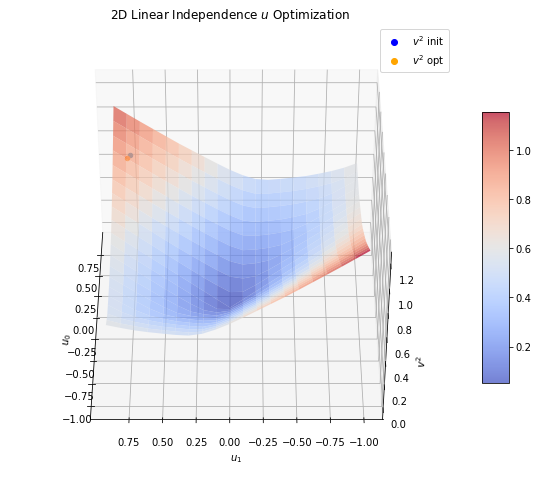

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X_surf, Y_surf, v_u_plt, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=.7)
ax.scatter([u[0]], [u[1]], [v_u])
ax.scatter([u_opt[0]], [u_opt[1]], [v_opt])
ax.set_xlabel(r"$u_0$")
ax.set_ylabel(r"$u_1$")
ax.set_zlabel(r"$v^2$")
ax.set_title(r"2D Linear Independence $u$ Optimization")
init_proxy = Line2D([0], [0], linestyle="none", c='blue', marker='o')
opt_proxy = Line2D([0], [0], linestyle="none", c='orange', marker='o')
ax.legend([init_proxy, opt_proxy], [r"$v^2$ init", r"$v^2$ opt"], numpoints=1)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(elev=40, azim=180);

## nD Simulated Linear Independence Data

### Initialize Data

In [17]:
lin_sim = SIMULATIONS["linear"]
X, Y = lin_sim(100, 10, noise=True)
D_X = dc.dist_mat(X)
D_Y = dc.dist_mat(Y)
R_X = dc.re_centered_dist(D_X)
R_Y = dc.re_centered_dist(D_Y)
u = np.random.rand(X.shape[1])
u = dc.normalize_u(u)
u_norm = LA.norm(u)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"u: {u}")
print(f"u norm: {u_norm}")
D_u = dc.dist_mat_u(u, X)
R_X_u = dc.re_centered_dist(D_u)

X shape: (100, 10)
Y shape: (100, 1)
u: [0.18548056 0.1287929  0.4005253  0.35201157 0.41291246 0.27877438
 0.21401616 0.33277003 0.33489178 0.38441322]
u norm: 1.0


### Test Function Dimension Alignment

In [18]:
du = dc.dist_cov_sq_grad(u, X, R_Y)
print(f"dvdu: {du}")
v = dc.dist_cov_sq(R_X, R_Y)
print(f"v^2: {v}")

dvdu: [-26.57130679 -44.21627761 -76.74251984 -49.75910914 -76.50767454
 -58.08199169 -45.7837102  -81.20829682 -84.20086504 -54.61796788]
v^2: 3.3999642386162674


### Optimize $u$

In [19]:
v_u = dc.dist_cov_sq(R_Y, R_X_u)
print(f"v^2_u: {v_u}")
u_opt, v_opt = dc.optim_u_gd(u, X, R_Y, 1e-2, 1e-6)
print(f"u opt: {u_opt}")
print(f"v^2_u_opt: {v_opt}")

v^2_u: 1.0158921441804218
u opt: [-0.03424817  0.26832949  0.45314196 -0.19934783  0.22947471  0.03901823
  0.2109621   0.09603824  0.75751146  0.00401544]
v^2_u_opt: 1.0957899600393182


### DCA

In [20]:
print(f"X shape: {X.shape}")
print(f"X:\n{X[:5]}")
U, v_dca = dc.dca_grad_learn(X, Y, K=3, lr=1e-2, epsilon=1e-6)
print(f"U shape: {U.shape}")
print(f"U:\n{U}")
print(f"v shape: {v_dca.shape}")
print(f"v: {v_dca}")
X_reduced = X @ U
print(f"X_reduced shape: {X_reduced.shape}")
print(f"X_reduced:\n{X_reduced[:5]}")

X shape: (100, 10)
X:
[[ 0.37110039  0.271703   -0.38531522  0.97505581  0.21039315  0.83797039
   0.32788227  0.59734325 -0.84920042  0.43923791]
 [-0.0875053  -0.50383967  0.71005503 -0.68196991  0.63157457  0.29158285
  -0.48513858 -0.15805225 -0.66506685  0.79335057]
 [ 0.42715651 -0.88046591 -0.87842016 -0.81339171  0.51871996 -0.47009168
   0.54738504  0.53504047 -0.17185528  0.18542916]
 [-0.68597327 -0.71732507 -0.34012409  0.03628004  0.55684414  0.09309406
   0.91185841 -0.17535746 -0.18511273 -0.05669143]
 [-0.21241886 -0.58265249 -0.71250134  0.42526601 -0.99983321 -0.51747062
  -0.86966167 -0.51631294 -0.70290986 -0.24196475]]


/home/db202/Repos/Neuro_Data_Design/hyppo/Dante-Basile_Fork/hyppo/mgc_dcorr/dist_cov.py:276: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  X_proj = proj_U(X_proj, U, k+1) # then inc k, unnecessary if this is last k
/home/db202/Repos/Neuro_Data_Design/hyppo/Dante-Basile_Fork/hyppo/mgc_dcorr/dist_cov.py:276: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  X_proj = proj_U(X_proj, U, k+1) # then inc k, unnecessary if this is last k


U shape: (10, 3)
U:
[[-0.03424814 -0.03422015 -0.03407991]
 [ 0.26832946  0.26842079  0.26835136]
 [ 0.453142    0.45307269  0.45317676]
 [-0.19934781 -0.19922088 -0.19928097]
 [ 0.22947471  0.22957647  0.22949441]
 [ 0.03901828  0.03917421  0.03905279]
 [ 0.2109621   0.21110805  0.21106553]
 [ 0.09603829  0.09603806  0.09602598]
 [ 0.75751145  0.75747476  0.75747249]
 [ 0.00401547  0.00418707  0.00412381]]
v shape: (3,)
v: [1.09578996 1.0957899  1.09578993]
X_reduced shape: (100, 3)
X_reduced:
[[-0.74278199 -0.74229    -0.74252154]
 [-0.13632072 -0.13630546 -0.13628124]
 [-0.34867041 -0.34868386 -0.34863193]
 [-0.1638551  -0.16371026 -0.16388388]
 [-1.57282058 -1.57310135 -1.5729854 ]]


## Projection

In [21]:
# k_pt = 1
# X_pt = np.array([5, 1])
# X_pt = X_pt / LA.norm(X_pt)
# U_pt = np.array([1, 2])
# U_pt = U_pt / LA.norm(U_pt)
# U_pt = np.expand_dims(U_pt, 0)
# q_pt = LA.qr(U_pt[:, :k_pt])
# X_proj_pt = dc.proj_U(X_pt, U_pt, k_pt)
# print(q_pt)

In [22]:
# x_range_pt = np.linspace(0, 1, 11)
# plt.plot(X_pt[0] * x_range_pt, X_pt[1] * x_range_pt)
# plt.plot(U_pt[:, 0] * x_range_pt, U_pt[:, 1] * x_range_pt)
# plt.plot(q_pt[0] * x_range_pt, q_pt[1] * x_range_pt)
# plt.plot(X_proj_pt[0] * x_range_pt, X_proj_pt[1] * x_range_pt)
# plt.legend(["X", "U", "q", "X proj"]);

## Replicate Figure 2 from Cowley

In [23]:
def unit_vec(v):
    return v / LA.norm(v)

def vec_angle(v0, v1):
    """
    Radians
    """
    u0 = unit_vec(v0)
    u1 = unit_vec(v1)
    return np.arccos(np.clip(np.dot(u0, u1), -1., 1.))

def beta_angle(beta_hat, beta):
    """
    Mean of all beta_i vectors (P x 1)
    """
    angle = 0
    b = beta_hat.shape[1]
    for i in range(b):
        v0 = beta_hat[:, i]
        v1 = beta[:, i]
        angle += vec_angle(v0, v1)
    return angle / (N * b)

def generate_data(N, P, b, f):
    """
    N: number of samples
    P: number of features
    b: number of dimensions identified from dimensionality reduction
    f: degree of nonlinearity
    returns
        X: (N x P): (feature x sample)
        beta: (P x b), beta_i: (P x 1)
        Y: (N x b)
    """
    X = np.random.normal(size=(N, P))
    alpha = 8 * np.sqrt(50) * LA.norm(X, ord=np.inf) # normalization constant
    
    plt.figure()
    x_range_plot = np.arange(-2*np.pi, 2*np.pi, .01)
    plt.plot(x_range_plot, np.sin(2 * np.pi / alpha * f * x_range_plot))
    plt.title(f"f: {f}, alpha: {alpha}")
    
    beta = np.random.normal(size=(P, b))
    beta, _ = LA.qr(beta)
    Y = np.random.normal(size=(N, b))
    for i in range(b):
        Y[:, i] = np.sin(2 * np.pi / alpha * f * X @ beta[:, i]) # (N x P) @ (P x 1) = (N x 1)
    return X, beta, Y

In [ ]:
N = 1000 # sample
P = 50 # feature
b = 5 # number of dimensions identified from dimensionality reduction
trial_ct = 1
f_range = [1] + [i for i in range(10, 130, 10)] # degree of nonlinearity
beta_angles = np.zeros((trial_ct, len(f_range)))
for i in range(trial_ct):
    print(f"trial: {i}")
    for j, f in enumerate(f_range):
        X, beta, Y = generate_data(N, P, b, f)
        beta_hat, v_hat = dc.dca_grad_learn(X, Y, K=b, lr=1e-2, epsilon=1e-6)
        angle = beta_angle(beta_hat, beta)
        print(f"f: {f}")
        print(f"beta angle: {np.rad2deg(angle)} deg")
        beta_angles[i, j] = angle
with open("dca_grad_learn_betas.pickle", 'wb') as wf:
    pickle.dump(beta_angles, wf)

trial: 0


In [ ]:
with open("dca_grad_learn_betas.pickle", 'rb') as rf:
    beta_angles = pickle.load(rf)
plt.plot(f_range, np.mean(np.rad2deg(beta_angles), axis=0))
plt.title("Mean Error Angle as a Function of Nonlinearity")
plt.xlabel("f")
plt.ylabel("angle: beta_hat, beta (deg)")
plt.legend(["DCA Gradient Learning"]);